# Gradient Descent

Xét hàm số f(x) = x^2 + 5sin(x):

In [ ]:
import numpy as np

In [8]:
def grad(x):
 return 2*x+ 5*np.cos(x)
def cost(x):
 return x**2 + 5*np.sin(x)
def myGD1(x0, eta):
 x = [x0]
 for it in range(100):
  x_new = x[-1] - eta*grad(x[-1])
  if abs(grad(x_new)) < 1e-3: # just a small number
   break
  x.append(x_new)
 return (x, it)

(x1, it1) = myGD1(-5, .1)
(x2, it2) = myGD1(5, .1)
print('Solution x1 = %f, cost = %f, after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, after 29 iterations


Quay lại với bài toán Linear Regression và thử tối ưu hàm mất mát của nó với thuật toán Gradient Descent:

In [10]:
from sklearn.linear_model import LinearRegression
X = np.random.rand(1000)
y = 4 + 3 * X + .5*np.random.randn(1000) # noise added
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, w])
print(sol_sklearn)

[4.03231271 2.97781993]


In [12]:
def grad(w):
 N = Xbar.shape[0]
 return 1/N * Xbar.T.dot(Xbar.dot(w) - y)
def cost(w):
 N = Xbar.shape[0]
 return .5/N*np.linalg.norm(y - Xbar.dot(w))**2
def myGD(w_init, grad, eta):
 w = [w_init]
 for it in range(100):
  w_new = w[-1] - eta*grad(w[-1])
  if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
   break
  w.append(w_new)
 return (w, it)

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)
w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Sol found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Sol found by GD: w =  [[6.35703584e+00 2.47614252e-03]
 [4.69604539e+00 1.81251864e-03]
 [4.27887947e+00 1.64584624e-03]
 ...
 [5.18964865e+00 2.00973044e-03]
 [5.61153368e+00 2.17828829e-03]
 [5.88099858e+00 2.28594896e-03]] ,
after 100 iterations.


In [13]:
def GD_momentum(grad, theta_init, eta, gamma):
 # Suppose we want to store history of theta
 theta = [theta_init]
 v_old = np.zeros_like(theta_init)
 for it in range(100):
  v_new = gamma*v_old + eta*grad(theta[-1])
  theta_new = theta[-1] - v_new
  if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
   break
 theta.append(theta_new)
 v_old = v_new
 return theta

def GD_NAG(grad, theta_init, eta, gamma):
 theta = [theta_init]
 v = [np.zeros_like(theta_init)]
 for it in range(100):
  v_new = gamma*v[-1] + eta*grad(theta[-1] - gamma*v[-1])
  theta_new = theta[-1] - v_new
  if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
   break
 theta.append(theta_new)
 v.append(v_new)
 return theta

# Perceptron learning algorithm

In [17]:
import numpy as np

def predict(w, X):
 '''predict label of each row of X, given w
 X: a 2-d numpy array of shape (N, d), each row is a datapoint
 w_init: a 1-d numpy array of shape (d)''' 
 return np.sign(X.dot(w))

def perceptron(X, y, w_init):
 '''perform perceptron learning algorithm
 X: a 2-d numpy array of shape (N, d), each row is a datapoint
 y: a 1-d numpy array of shape (N), label of each row of X. y[i] = 1/-1
 w_init: a 1-d numpy array of shape (d) ''' 
 w = w_init
 while True:
  pred = predict(w, X)
  # find indexes of misclassified points
  mis_idxs = np.where(np.equal(pred, y) == False)[0]
  # number of misclassified points
  num_mis = mis_idxs.shape[0]
  if num_mis == 0: # no more misclassified points
   return w
  # random pick one misclassified point
  random_id = np.random.choice(mis_idxs, 1)[0]
  # update w
  w = w + y[random_id]*X[random_id]

means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

# Case study

## Generating some data

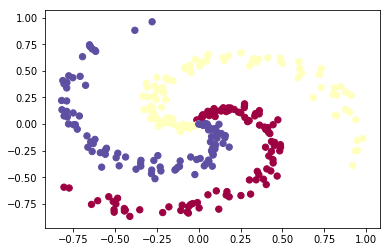

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## Training a softmax linear classifier

### Initialize the parameters

In [9]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

### Compute the class scores

In [10]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

### Compute the loss

In [11]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
correct_logprobs = -np.log(probs[range(num_examples),y])
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

### Computing the Analytic Gradient with Backpropagation

In [12]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

### Performing a parameter update

In [13]:
# perform a parameter update
W += -step_size * dW
b += -step_size * db

### Putting it all together: Training a Softmax Classifier

iteration 0: loss 1.096988
iteration 10: loss 0.910843
iteration 20: loss 0.841656
iteration 30: loss 0.810281
iteration 40: loss 0.794015
iteration 50: loss 0.784806
iteration 60: loss 0.779268
iteration 70: loss 0.775789
iteration 80: loss 0.773533
iteration 90: loss 0.772032
iteration 100: loss 0.771014
iteration 110: loss 0.770314
iteration 120: loss 0.769825
iteration 130: loss 0.769482
iteration 140: loss 0.769238
iteration 150: loss 0.769063
iteration 160: loss 0.768938
iteration 170: loss 0.768847
iteration 180: loss 0.768782
iteration 190: loss 0.768734
training accuracy: 0.51


(-1.8669053524879256, 1.9530946475120778)

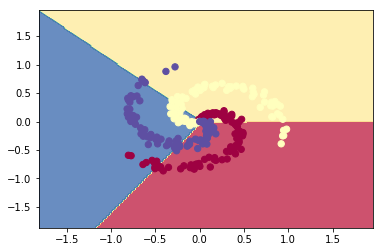

In [20]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


## Training a neural network

iteration 0: loss 1.098521
iteration 1000: loss 0.307957
iteration 2000: loss 0.254481
iteration 3000: loss 0.248435
iteration 4000: loss 0.247368
iteration 5000: loss 0.247157
iteration 6000: loss 0.247061
iteration 7000: loss 0.247005
iteration 8000: loss 0.246938
iteration 9000: loss 0.246877
training accuracy: 0.98


(-1.8669053524879256, 1.9530946475120778)

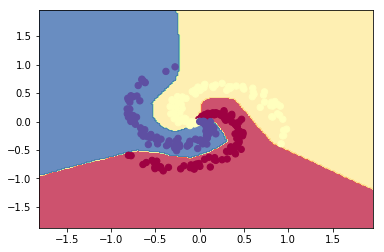

In [21]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())